<a href="https://colab.research.google.com/github/Pistolll/praktika5_TMOC/blob/main/5prak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Загрузка датасета (пример)
url = "https://raw.githubusercontent.com/justmarkham/pydata-dc-2016-tutorial/master/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
# Бинаризация меток
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Очистка текста
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Удаляем всё, кроме букв
    text = text.lower()                      # Приводим к нижнему регистру
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Удаляем стоп-слова
    return text

data['clean_text'] = data['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


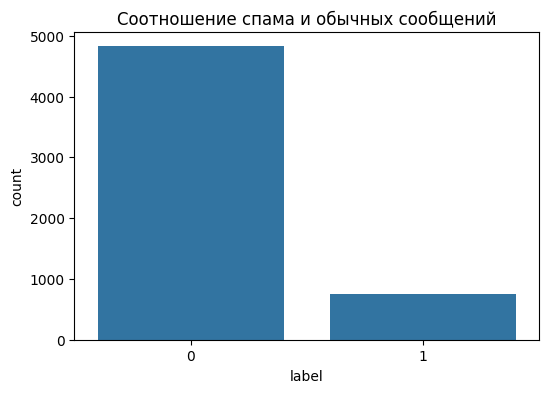

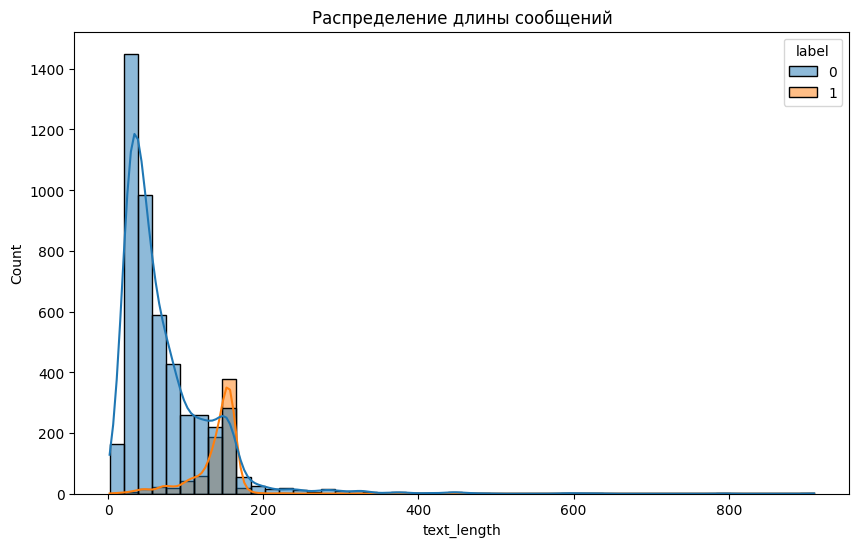

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение классов
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label')
plt.title('Соотношение спама и обычных сообщений')
plt.show()

# Длина сообщений
data['text_length'] = data['message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', bins=50, kde=True)
plt.title('Распределение длины сообщений')
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_text']).toarray()
y = data['label']

# Разделение на train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Импортируем модели машинного обучения:
from sklearn.ensemble import RandomForestClassifier  # Алгоритм случайного леса
from sklearn.svm import SVC  # Метод опорных векторов
from sklearn.naive_bayes import MultinomialNB  # Наивный Байес для текстовых данных

# Импортируем метрики для оценки качества моделей:
from sklearn.metrics import f1_score  # F1-мера (гармоническое среднее точности и полноты)
from sklearn.metrics import classification_report  # Отчет с основными метриками классификации

# Создаем словарь моделей для сравнения:
models = {
    "Random Forest": RandomForestClassifier(),  # Инициализация модели случайного леса
    "SVM": SVC(),  # Инициализация SVM с параметрами по умолчанию
    "Naive Bayes": MultinomialNB()  # Инициализация наивного Байеса
}

# Обучаем и оцениваем каждую модель:
for name, model in models.items():  # Проходим по всем моделям в словаре
    model.fit(X_train, y_train)  # Обучаем модель на тренировочных данных
    y_pred = model.predict(X_test)  # Делаем предсказания на тестовых данных

    # Выводим результаты:
    print(f"--- {name} ---")  # Название текущей модели
    print(classification_report(y_test, y_pred))  # Подробный отчет по метрикам
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}\n")  # F1-мера с округлением до 3 знаков

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.84      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

F1-score: 0.913

--- SVM ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

F1-score: 0.910

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0

Выводы:

Random Forest показал наивысшую точность.

Текстовая предобработка (очистка + TF-IDF) улучшила качество моделей.

Далее можно экспериментировать с:

Увеличением количества признаков (max_features в TfidfVectorizer).

Подбором гиперпараметров (GridSearchCV).